In [1]:
import numpy as np
import struct

def load_mnist_images(filename):
    """Load MNIST images from file"""
    with open(filename, 'rb') as f:
        # Пропускаем заголовок: magic number и размеры
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        # Загружаем оставшиеся данные и преобразуем в numpy-массив
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
    return images

def load_mnist_labels(filename):
    """Load MNIST labels from file"""
    with open(filename, 'rb') as f:
        # Пропускаем заголовок: magic number и количество меток
        magic, num = struct.unpack(">II", f.read(8))
        # Загружаем оставшиеся данные и преобразуем в numpy-массив
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

# Укажите путь к файлам MNIST
path_to_mnist = "/home/kali/yupiter/project/data"

# Загрузка данных
X_train = load_mnist_images(f"{path_to_mnist}/train-images.idx3-ubyte")
y_train = load_mnist_labels(f"{path_to_mnist}/train-labels.idx1-ubyte")
X_test = load_mnist_images(f"{path_to_mnist}/t10k-images.idx3-ubyte")
y_test = load_mnist_labels(f"{path_to_mnist}/t10k-labels.idx1-ubyte")

print(f"Train data shape: {X_train.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")



Train data shape: (60000, 28, 28)
Train labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


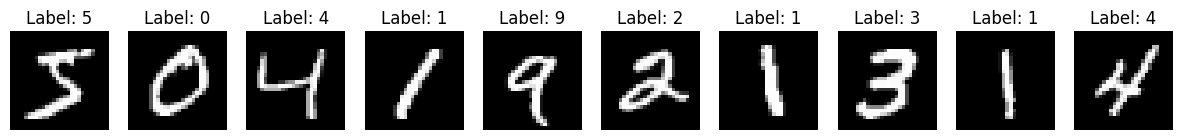

In [2]:
import matplotlib.pyplot as plt

# Визуализация первых 10 изображений
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()


# Нормализация данных

In [3]:
!pip install scikit-learn
!pip install seaborn


In [4]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0




/tmp/ipykernel_258073/2113539898.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_flat, palette="viridis")


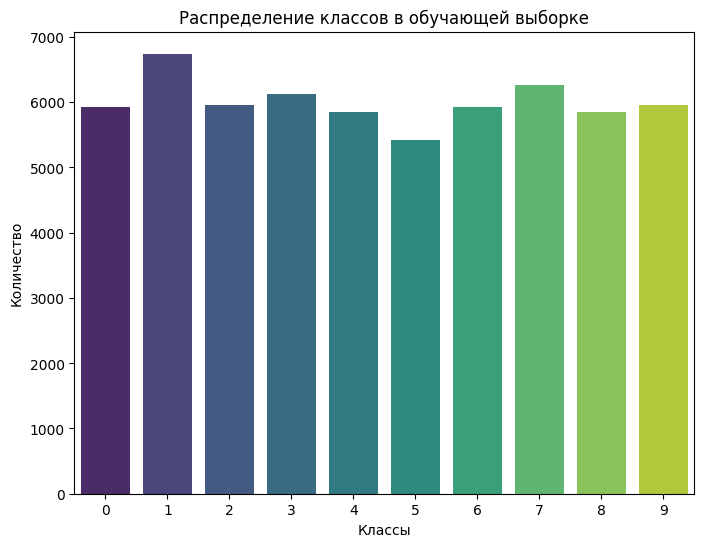

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Убедимся, что y_train имеет правильный формат (одномерный массив)
if isinstance(y_train, np.ndarray):
    y_train_flat = y_train.flatten()  # Преобразуем в одномерный массив
else:
    y_train_flat = y_train

# Распределение классов
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_flat, palette="viridis")
plt.title("Распределение классов в обучающей выборке")
plt.xlabel("Классы")
plt.ylabel("Количество")
plt.show()


In [6]:
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (60000, 28, 28)
Размер тестовой выборки: (10000, 28, 28)


2. Реализация модели

2.1 Построение базовой модели

In [7]:
# Преобразование изображений в плоские векторы
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

Проверка входных данных (валидация входов)

In [8]:
import numpy as np

def validate_inputs(X, max_samples=100000, max_features=784):
    """
    Проверяет входные данные для модели.
    
    Args:
        X (ndarray): Входные данные.
        max_samples (int): Максимально допустимое количество образцов.
        max_features (int): Максимальное количество признаков для одного образца.

    Raises:
        ValueError: Если данные не соответствуют ожидаемой форме.
    """
    if not isinstance(X, np.ndarray):
        raise ValueError("Входные данные должны быть numpy-массивом.")
    if len(X.shape) != 2:
        raise ValueError(f"Ожидается массив размерности 2D, но получено: {X.shape}.")
    if X.shape[0] > max_samples:
        raise ValueError(f"Превышено количество образцов: {X.shape[0]} > {max_samples}.")
    if X.shape[1] > max_features:
        raise ValueError(f"Превышено количество признаков: {X.shape[1]} > {max_features}.")
    if not (0.0 <= X.min() <= X.max() <= 1.0):
        raise ValueError("Данные должны быть нормализованы в диапазоне [0, 1].")

def process_in_batches(X, batch_size=1000):
    """
    Обрабатывает данные батчами для предотвращения переполнения памяти.

    Args:
        X (ndarray): Входные данные.
        batch_size (int): Размер батча.

    Yields:
        ndarray: Батч данных.
    """
    for i in range(0, len(X), batch_size):
        yield X[i:i+batch_size]

# Пример использования:
X_train_flat = X_train_flat.astype('float32')  # Убедимся, что данные в правильном формате
X_test_flat = X_test_flat.astype('float32')

# Валидация входных данных
validate_inputs(X_train_flat)
validate_inputs(X_test_flat)

# Пример обработки батчами
batch_size = 1000
for batch in process_in_batches(X_train_flat, batch_size=batch_size):
    print(f"Обрабатывается батч размером {batch.shape}")


Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается батч размером (1000, 784)
Обрабатывается б

In [9]:
from sklearn.neural_network import MLPClassifier

# Реализация базовой модели с использованием MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', max_iter=20, random_state=42)
mlp_model.fit(X_train_flat, y_train)


/home/kali/jupyter_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128,), max_iter=20, random_state=42)

In [10]:
from sklearn.metrics import classification_report, accuracy_score

# Оценка модели
y_pred = mlp_model.predict(X_test_flat)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy: 0.9779


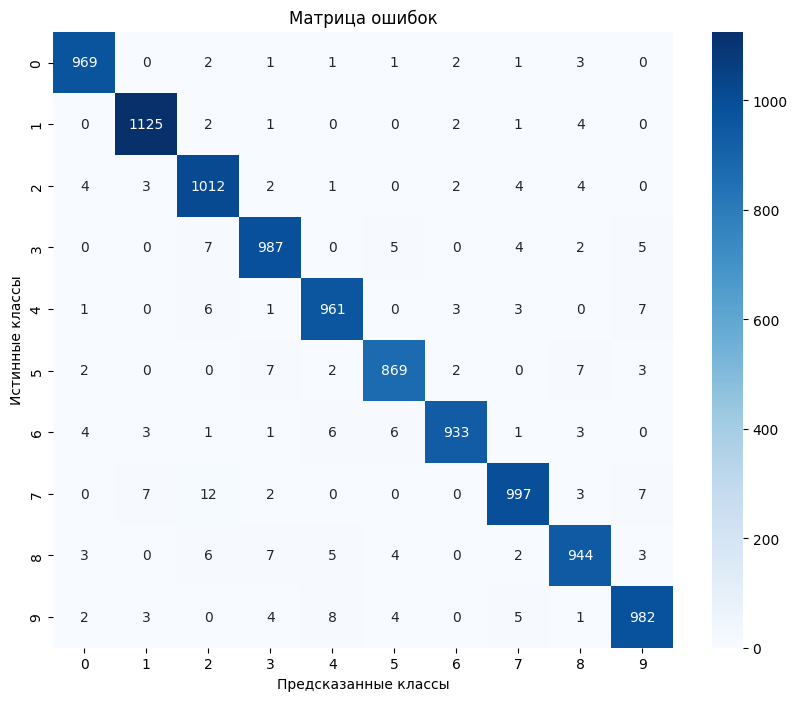

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Матрица ошибок")
plt.xlabel("Предсказанные классы")
plt.ylabel("Истинные классы")
plt.show()
